In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#using the step1 here
%run step1_cleaning_precocessing.ipynb
#exploratory data analysis (eda)
data = data


city sales

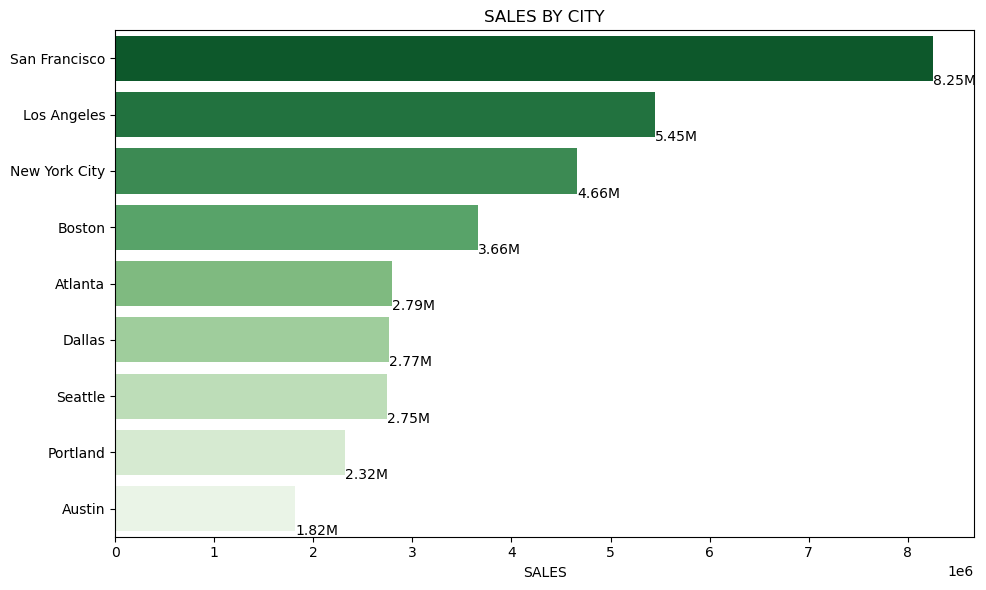

In [206]:

city_sales = data.groupby('City')['Total_Sales'].sum().sort_values(ascending = False).to_frame()
plt.figure(figsize=(10,6))
ax = sns.barplot(x= city_sales['Total_Sales'],
            y= city_sales.index,
            hue = city_sales.index,
            palette= 'Greens_r'
            )
for i in ax.patches:
    ax.text(i.get_width(), i.get_y() + i.get_height(), f'{i.get_width()/1000000:.2f}M',
            ha = 'left' , va = 'center')


plt.xlabel('SALES')
plt.ylabel('')
plt.title('SALES BY CITY')
plt.tight_layout()
plt.show()


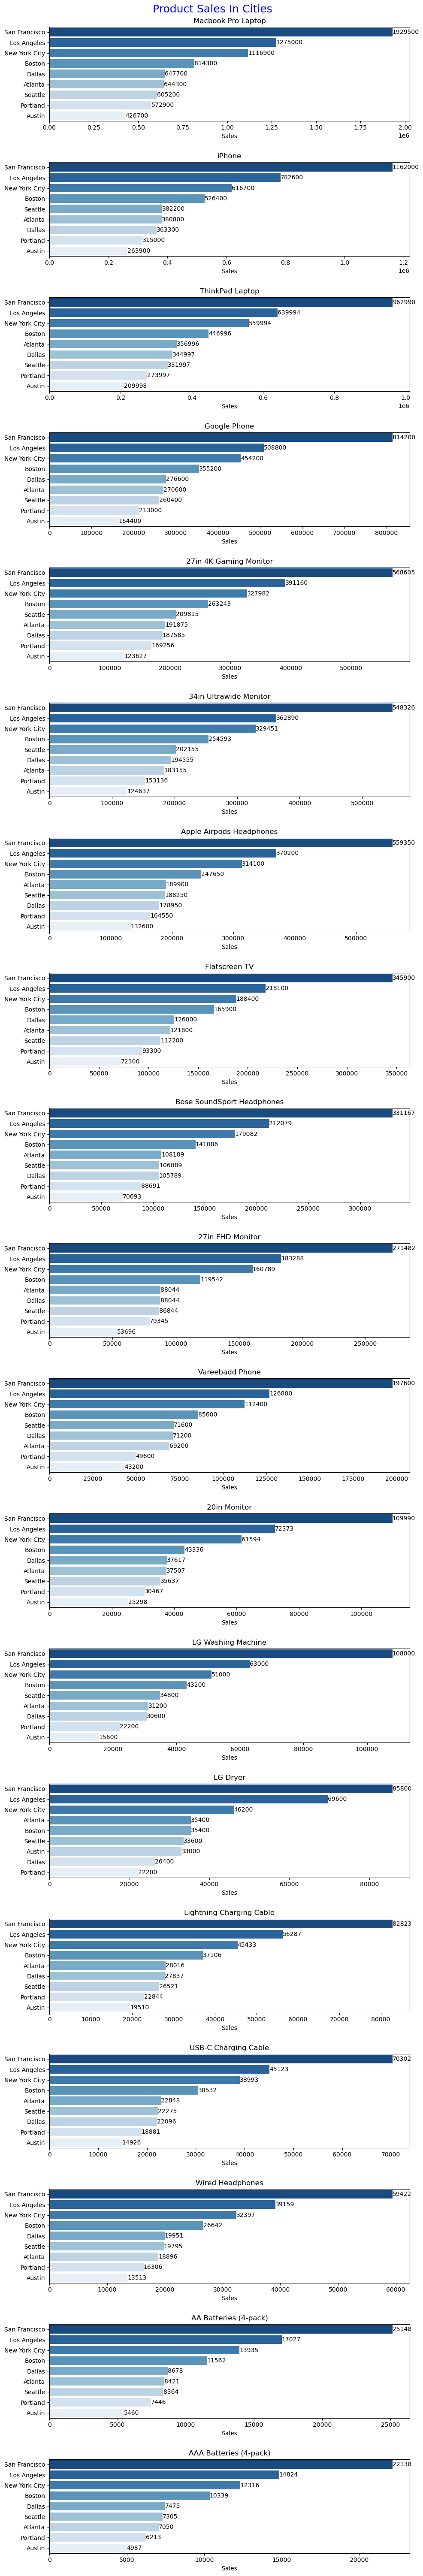

In [225]:
city_product_sales = data.pivot_table(values= 'Total_Sales',
                 index = 'City',
                 columns = 'Product',
                 aggfunc = 'sum')
city_product_sales.loc['total'] = city_product_sales.sum()
city_product_sales = city_product_sales.T.sort_values('total',ascending= False).T
city_product_sales =city_product_sales.drop('total')
products = city_product_sales.columns.values.tolist()

fig, ax = plt.subplots(len(products),1,figsize=(10,60))
for i, val in enumerate(products):
    srt = city_product_sales[val].sort_values(ascending = False).reset_index()
    sns.barplot(x = srt[val],
                y= srt['City'],
                hue= srt['City'],
                palette= 'Blues_r',
                ax= ax[i])
    for index,value in enumerate(srt[val]):
        ax[i].text(value, index, f'{value:.0f}', ha = 'left', va = 'center')

    ax[i].set_title(f'\n{products[i]}')
    ax[i].set_xlabel('Sales')
    ax[i].set_ylabel('')

plt.tight_layout() 
plt.suptitle('Product Sales In Cities', y= 1, fontsize =18, color = 'blue', ha = 'center') 
plt.show()

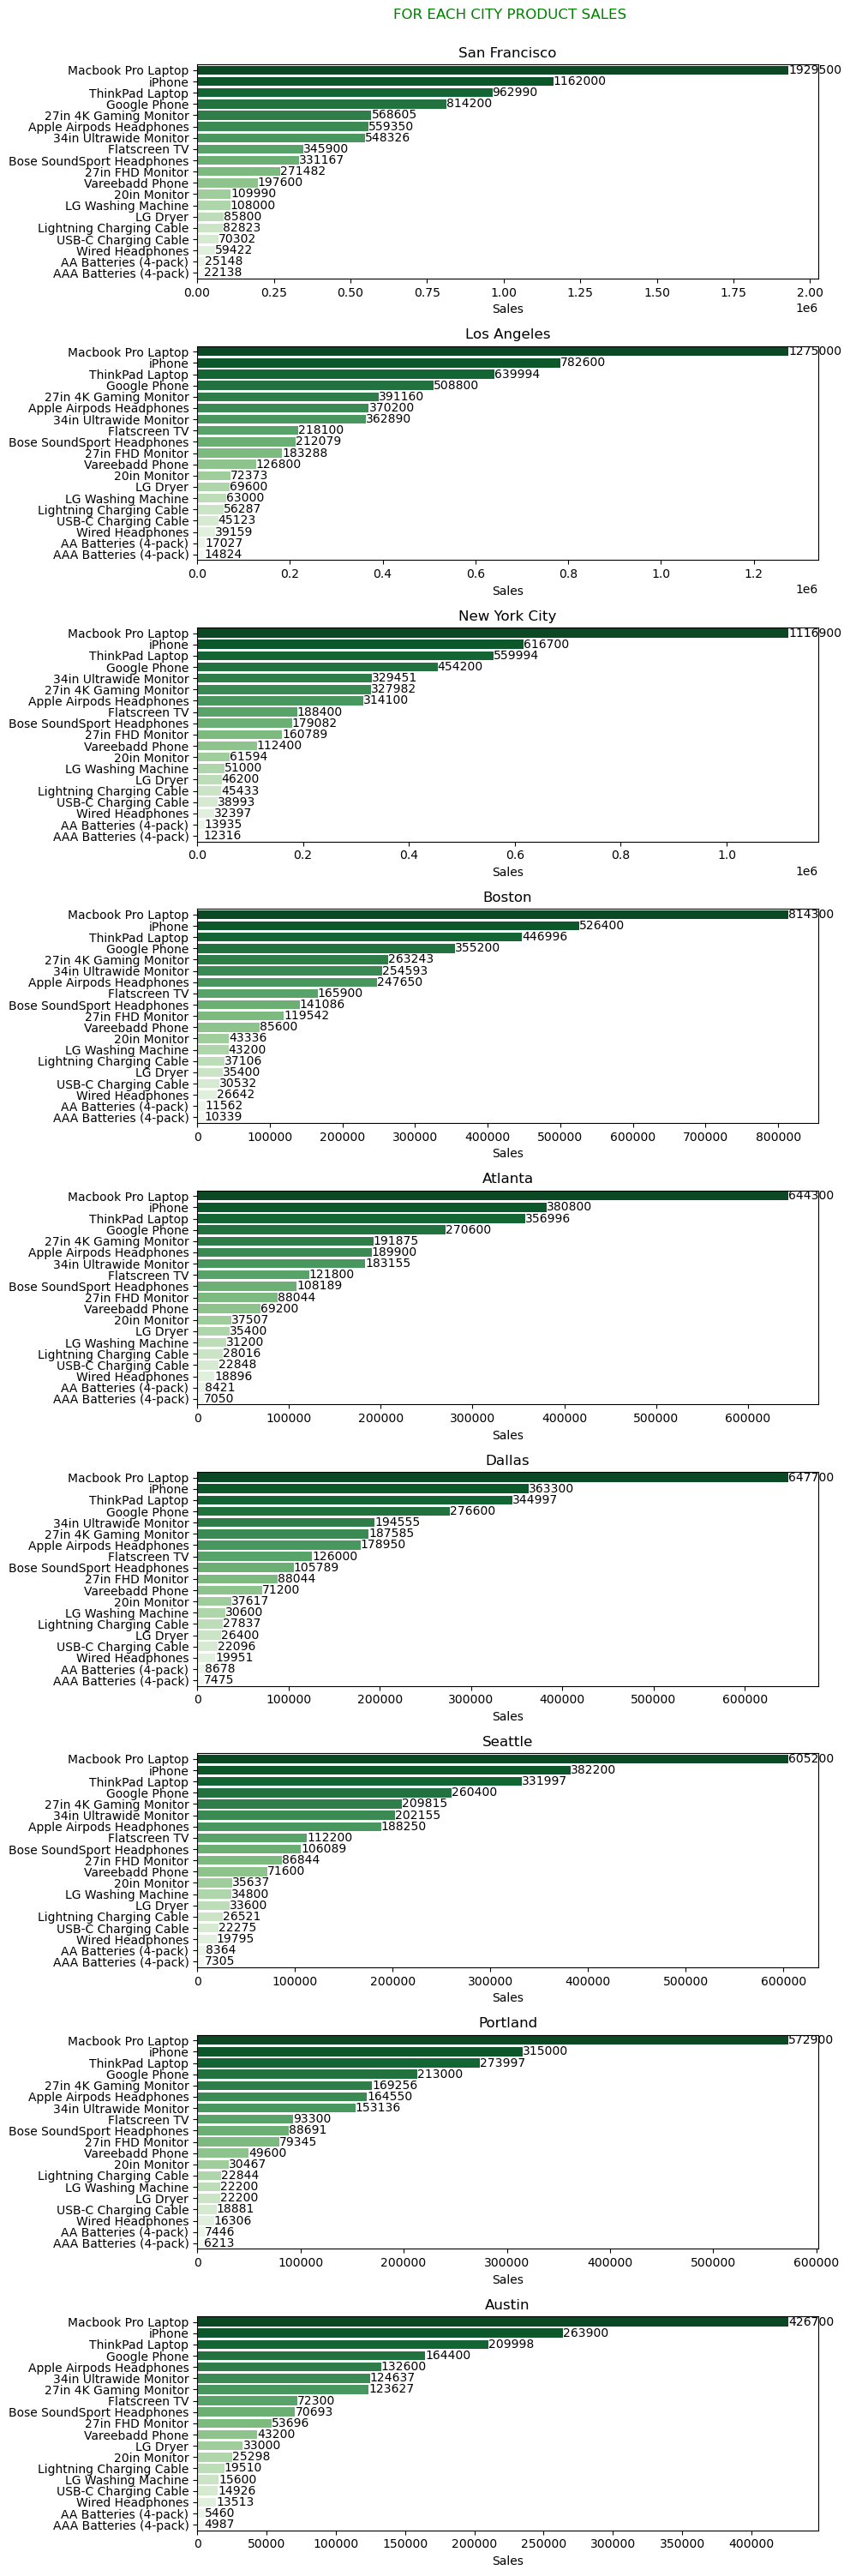

In [226]:
city_product_sales = city_product_sales.T 
city_product_sales.loc['tot'] = city_product_sales.sum()
city_product_sales = city_product_sales.T.sort_values('tot', ascending=False).T



city_product_sales.drop('tot', inplace= True)

cities = city_product_sales.columns.to_list()
fig, ax = plt.subplots(len(cities),1,figsize=(10,30))
for i,city in enumerate(cities):
    srt = city_product_sales[city].sort_values().reset_index()
    sns.barplot(x= srt[city],
                y= srt['Product'],
                hue= srt['Product'],
                palette="Greens",
                ax= ax[i])
    
    for index,value in enumerate(srt[city]):
        ax[i].text(value,index, f'{value:.0f}', ha="left", va='center')

    ax[i].invert_yaxis()
    ax[i].set_title(f'{cities[i]}')
    ax[i].set_xlabel('Sales')
    ax[i].set_ylabel('')
plt.suptitle('FOR EACH CITY PRODUCT SALES', y=1, color= 'green', x =0.6)
plt.tight_layout()
plt.show()

a heat quick identify the  product sales in city

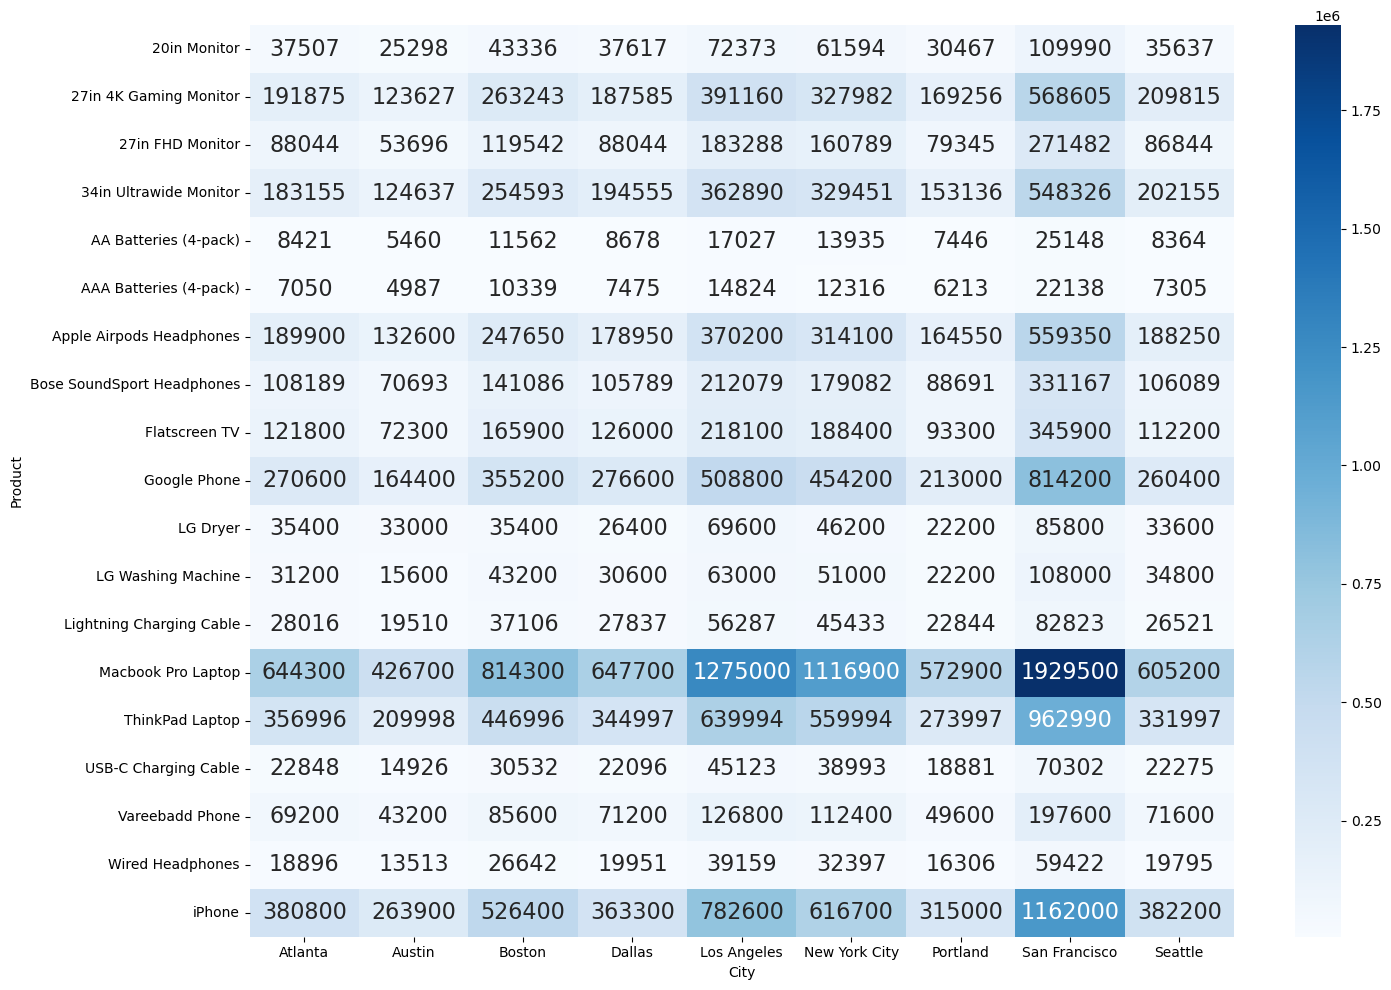

In [231]:
city_product = data.pivot_table(columns='City',
                                index='Product',
                                values='Total_Sales',
                                aggfunc='sum')
city_product
plt.figure(figsize=(15,10))
sns.heatmap(city_product, annot=True,cmap='Blues',fmt='.0f', annot_kws={'size':16})
plt.tight_layout()
plt.show()

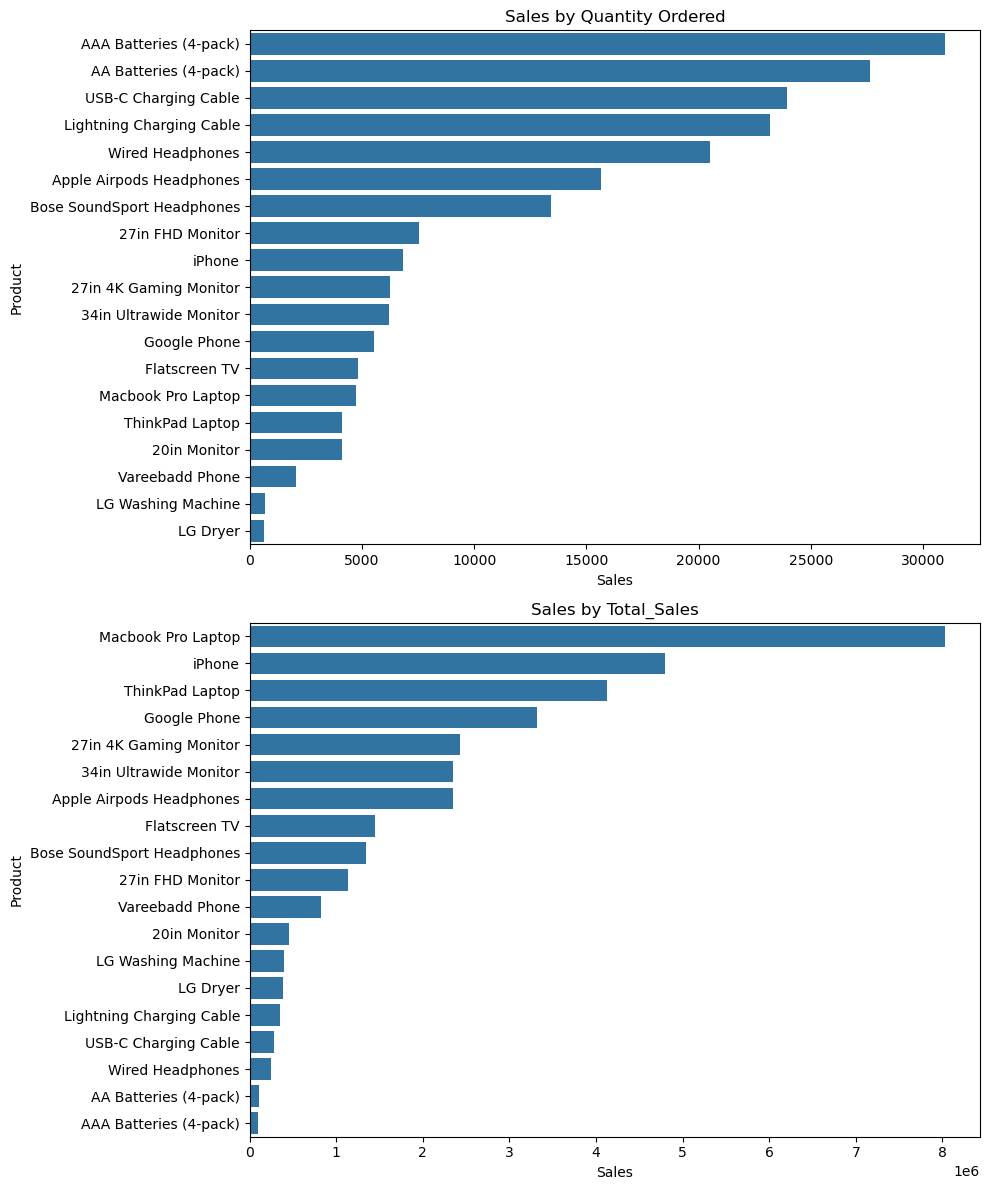